# This notebook implements the multivariate setup of Section 4.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Input
from keras import optimizers
from tqdm import tqdm_notebook as tqdm
from scipy.stats import random_correlation
#from pyitlib import discrete_random_variable as drv
import scipy.stats as stats
from entropy import *
from scipy.stats import multinomial, geom
from scipy.stats import poisson
from keras.utils import to_categorical
import keras

Using TensorFlow backend.


In [3]:
import os

# generating simulated data 

In [4]:
def rmse(lst, true_val):
    return (np.mean((np.array(lst) - true_val)**2))**0.5

In [5]:
def harmonic(n, alpha):
    a = 0
    for i in range(1, n):
        a += 1/i**alpha
        
    return a

In [6]:
# convert class to one hot 
def convert_to_one_hot(y, dict_size=None):
    if dict_size is None:
        dict_size = np.unique(y).shape[0]
    y_hot = np.eye(dict_size)[y.astype('int32')]
    return y_hot

def make_one_hot(y, dims, dict_size=None):
    y_hot = []
    for i in range(dims):
        y_hot.append(convert_to_one_hot(y[:, i], dict_size))
    return y_hot

In [7]:
def zipf_dist(alpha, N, size):
    x = np.arange(1, N+1, dtype='float')
    weights = x ** (-alpha)
    weights /= weights.sum()
    bounded_zipf = stats.rv_discrete(name='bounded_zipf', values=(x, weights))
    data = np.reshape(np.array(bounded_zipf.rvs(size=size)), [-1, 1])
    return data

In [8]:
def zipf_entropy(alphabet, alpha):
    p = np.arange(1, alphabet, dtype='float')**(-alpha)
    c = harmonic(alphabet, alpha)
    H_zipf = -(1/c)*np.sum(p*np.log(p/c))
    return H_zipf

#  model definition

In [9]:
# basic fc model with number of losses equales to dims - the dimensions of Y
def model_basic_classification(input_shape, class_size):
    l0 = Input(shape=input_shape, dtype = 'float32', name = 'input_l')
    X = Dense(units=500, kernel_initializer='random_uniform', name = 'l1')(l0)
    X = Dense(units=500, kernel_initializer='random_uniform', name = 'l2')(X)
    output = [Dense(class_size, activation='softmax')(X) for i in range(1) ]
    model = Model(input = [l0], outputs =  output )
    return model

In [27]:
alphabet = 10**5
size = 5000
alpha = 1

for i in range(10):
    data_zipf = zipf_dist(alpha=alpha, N=alphabet, size=size)
    data = data_zipf
    pd.DataFrame(data).to_csv('results/data_zipf_alpha_1_5000samples_alphabet_10_5/data_zipf_alpha_1_5000samples_alphabet_10_5_({}).csv'.format(i), index=False)

# Estimating H(X)

C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 5000, 2)
(100,)


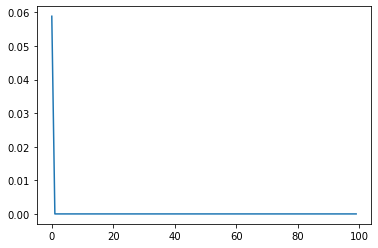

dim number 2
(1, 5000, 2)
(100,)


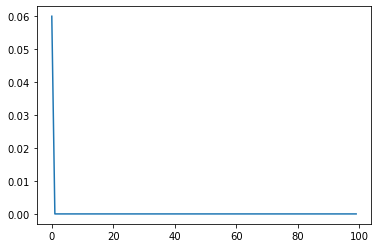

dim number 3
(1, 5000, 2)
(100,)


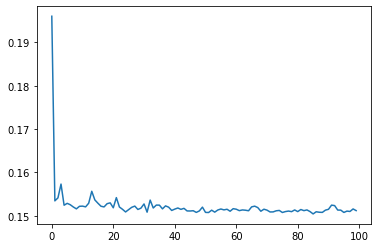

dim number 4
(1, 5000, 2)
(100,)


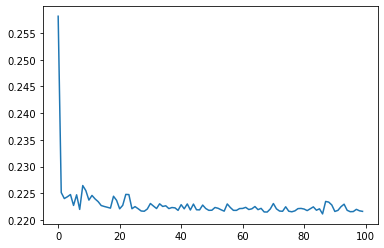

dim number 5
(1, 5000, 2)
(100,)


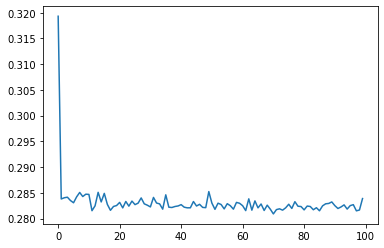

dim number 6
(1, 5000, 2)
(100,)


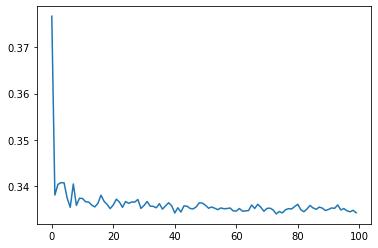

dim number 7
(1, 5000, 2)
(100,)


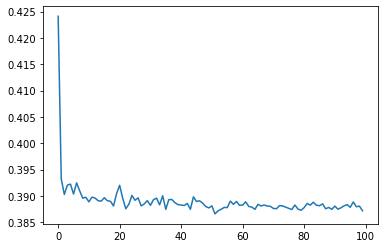

dim number 8
(1, 5000, 2)
(100,)


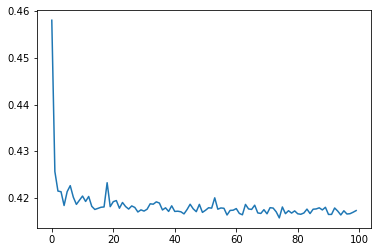

dim number 9
(1, 5000, 2)
(100,)


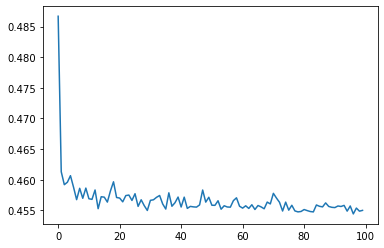

dim number 10
(1, 5000, 2)
(100,)


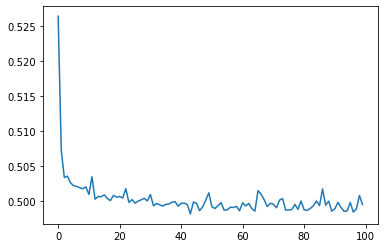

dim number 11
(1, 5000, 2)
(100,)


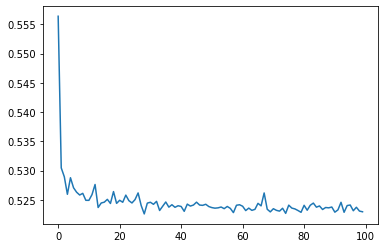

dim number 12
(1, 5000, 2)
(100,)


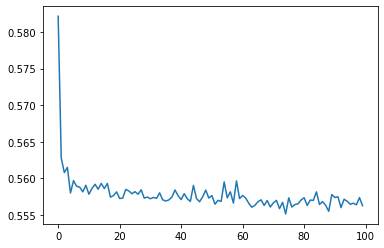

dim number 13
(1, 5000, 2)
(100,)


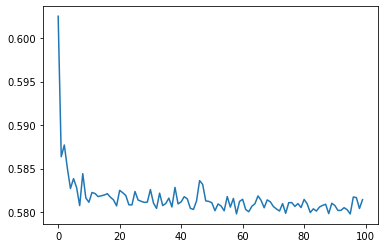

dim number 14
(1, 5000, 2)
(100,)


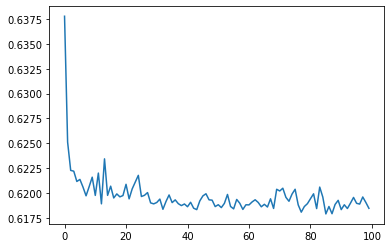

dim number 15
(1, 5000, 2)
(100,)


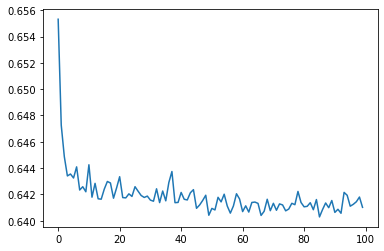

dim number 16
(1, 5000, 2)
(100,)


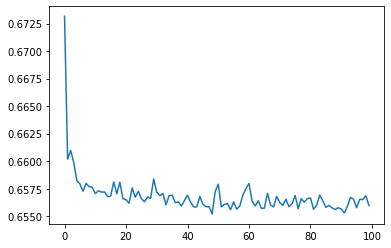

dim number 17
(1, 5000, 2)
(100,)


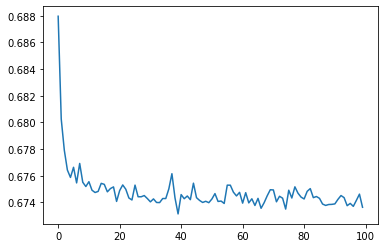

dim number 18
(1, 5000, 2)
(100,)


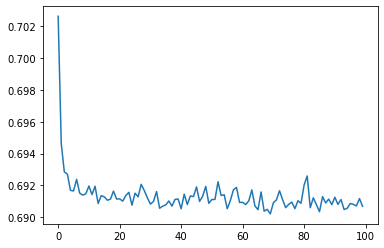

dim number 19
(1, 5000, 2)
(100,)


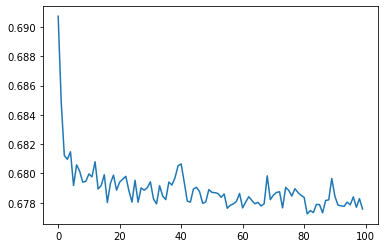

[8.367976455023664]
7.967998491428407


C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 5000, 2)
(100,)


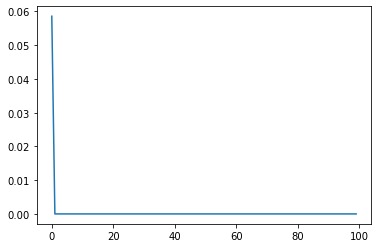

dim number 2
(1, 5000, 2)
(100,)


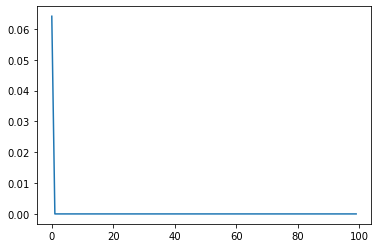

dim number 3
(1, 5000, 2)
(100,)


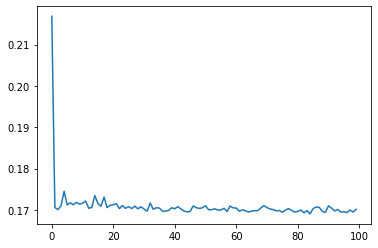

dim number 4
(1, 5000, 2)
(100,)


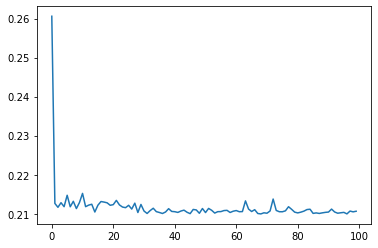

dim number 5
(1, 5000, 2)
(100,)


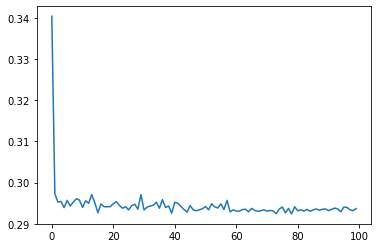

dim number 6
(1, 5000, 2)
(100,)


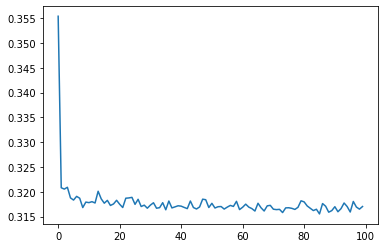

dim number 7
(1, 5000, 2)
(100,)


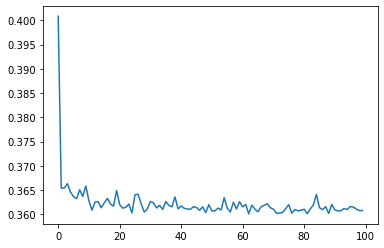

dim number 8
(1, 5000, 2)
(100,)


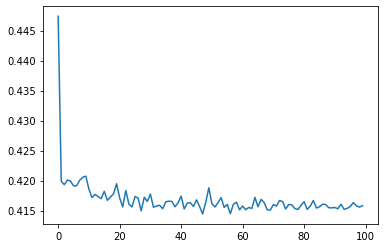

dim number 9
(1, 5000, 2)
(100,)


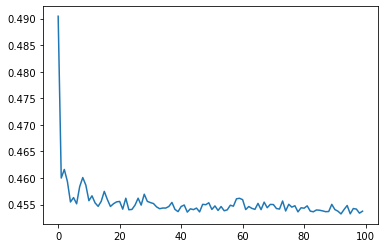

dim number 10
(1, 5000, 2)
(100,)


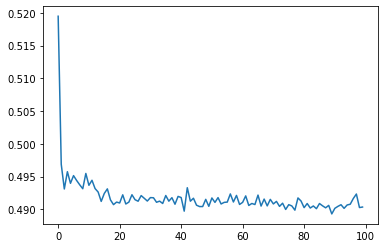

dim number 11
(1, 5000, 2)
(100,)


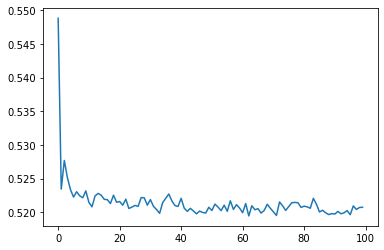

dim number 12
(1, 5000, 2)
(100,)


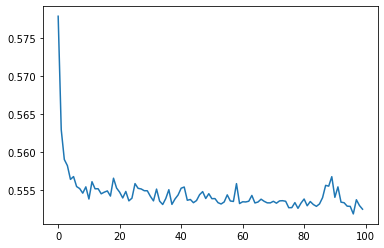

dim number 13
(1, 5000, 2)
(100,)


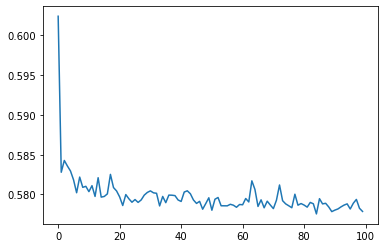

dim number 14
(1, 5000, 2)
(100,)


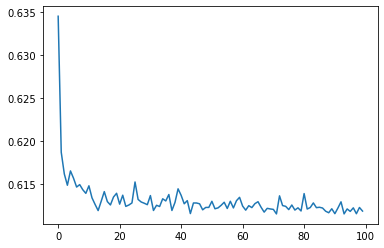

dim number 15
(1, 5000, 2)
(100,)


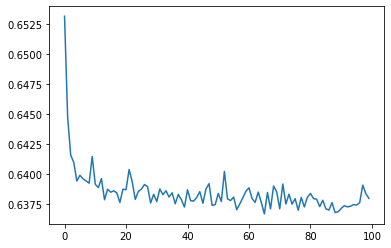

dim number 16
(1, 5000, 2)
(100,)


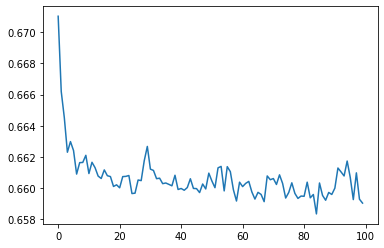

dim number 17
(1, 5000, 2)
(100,)


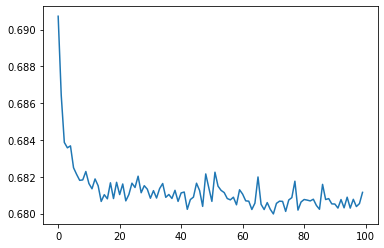

dim number 18
(1, 5000, 2)
(100,)


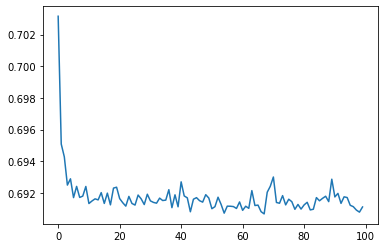

dim number 19
(1, 5000, 2)
(100,)


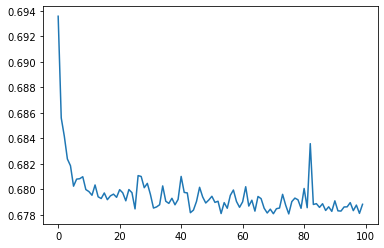

[8.367976455023664, 8.323180875637906]
7.967998491428407


C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 5000, 2)
(100,)


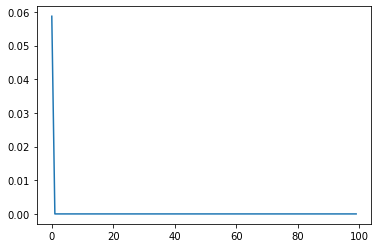

dim number 2
(1, 5000, 2)
(100,)


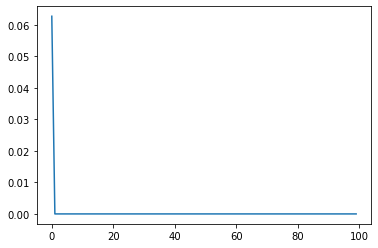

dim number 3
(1, 5000, 2)
(100,)


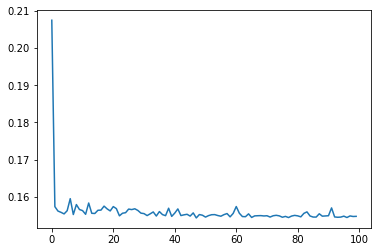

dim number 4
(1, 5000, 2)
(100,)


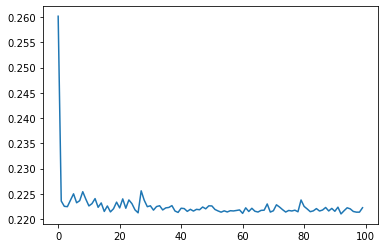

dim number 5
(1, 5000, 2)
(100,)


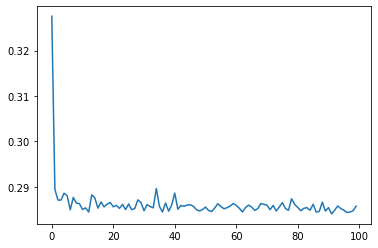

dim number 6
(1, 5000, 2)
(100,)


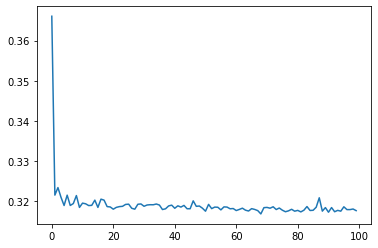

dim number 7
(1, 5000, 2)
(100,)


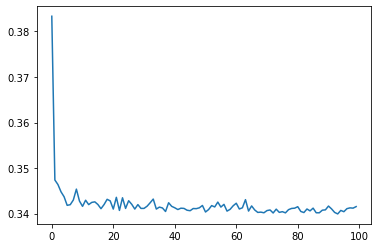

dim number 8
(1, 5000, 2)
(100,)


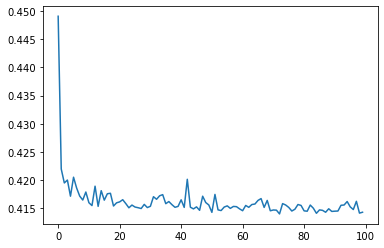

dim number 9
(1, 5000, 2)
(100,)


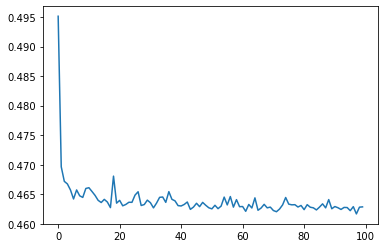

dim number 10
(1, 5000, 2)
(100,)


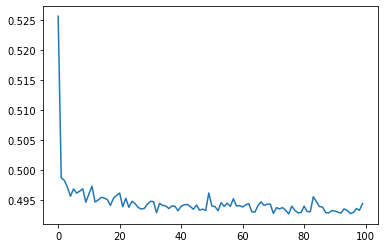

dim number 11
(1, 5000, 2)
(100,)


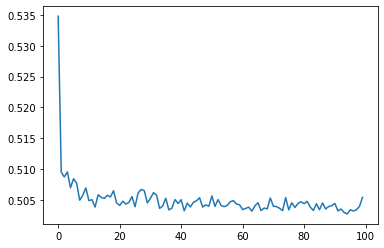

dim number 12
(1, 5000, 2)
(100,)


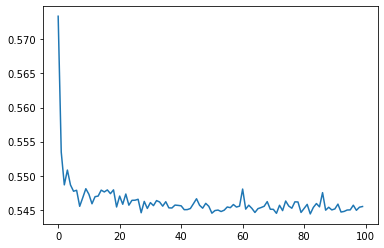

dim number 13
(1, 5000, 2)
(100,)


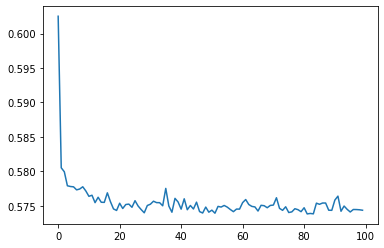

dim number 14
(1, 5000, 2)
(100,)


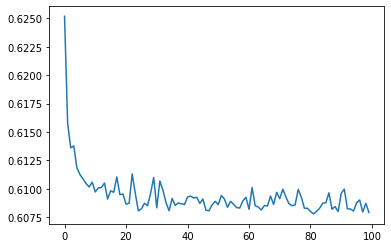

dim number 15
(1, 5000, 2)
(100,)


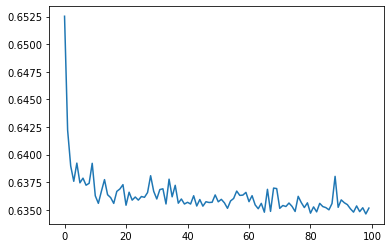

dim number 16
(1, 5000, 2)
(100,)


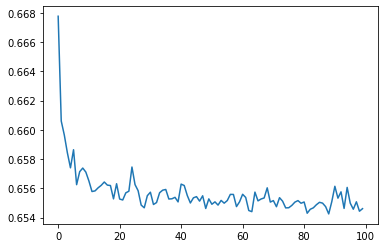

dim number 17
(1, 5000, 2)
(100,)


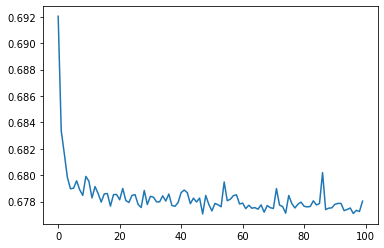

dim number 18
(1, 5000, 2)
(100,)


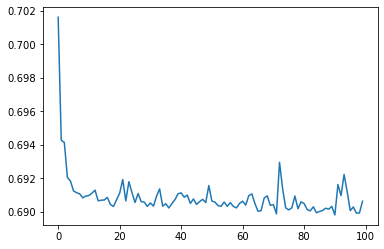

dim number 19
(1, 5000, 2)
(100,)


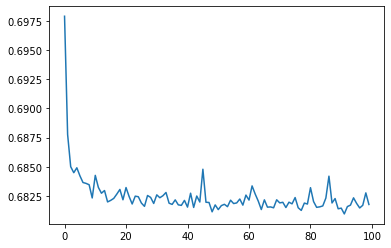

[8.367976455023664, 8.323180875637906, 8.266730673178811]
7.967998491428407


C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 5000, 2)
(100,)


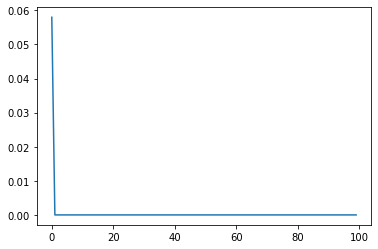

dim number 2
(1, 5000, 2)
(100,)


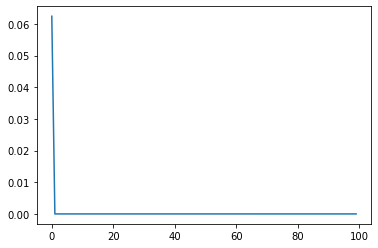

dim number 3
(1, 5000, 2)
(100,)


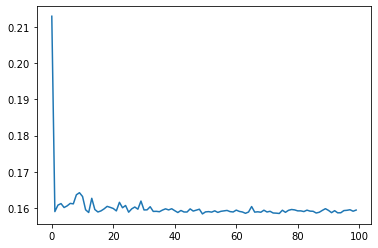

dim number 4
(1, 5000, 2)
(100,)


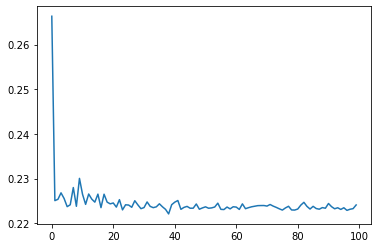

dim number 5
(1, 5000, 2)
(100,)


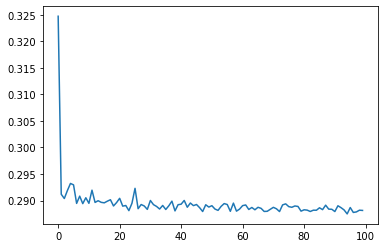

dim number 6
(1, 5000, 2)
(100,)


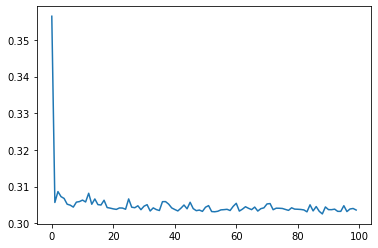

dim number 7
(1, 5000, 2)
(100,)


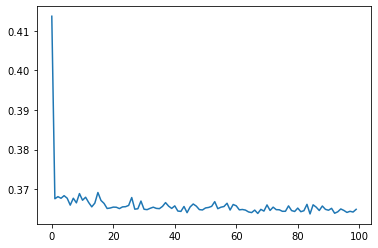

dim number 8
(1, 5000, 2)
(100,)


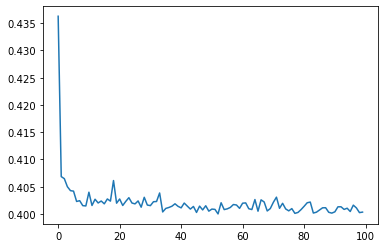

dim number 9
(1, 5000, 2)
(100,)


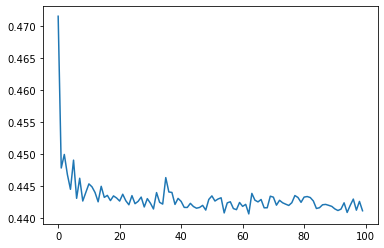

dim number 10
(1, 5000, 2)
(100,)


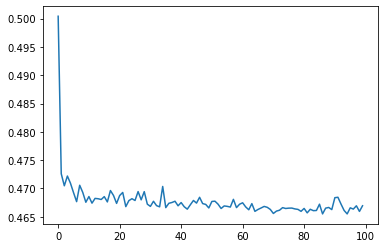

dim number 11
(1, 5000, 2)
(100,)


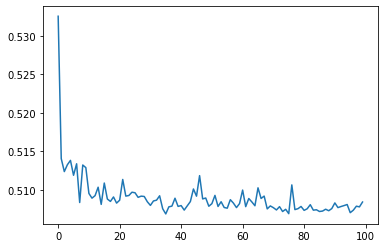

dim number 12
(1, 5000, 2)
(100,)


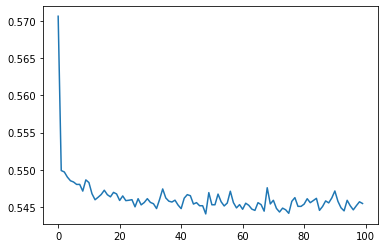

dim number 13
(1, 5000, 2)
(100,)


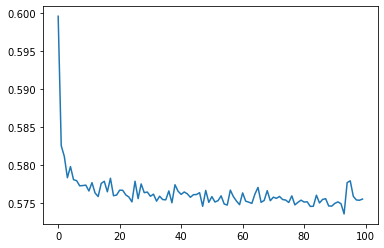

dim number 14
(1, 5000, 2)
(100,)


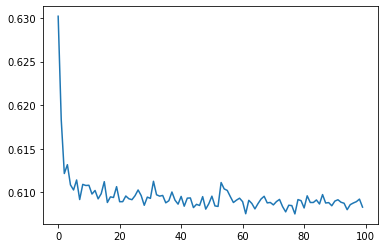

dim number 15
(1, 5000, 2)
(100,)


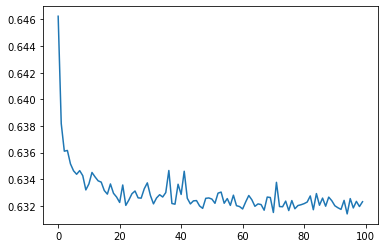

dim number 16
(1, 5000, 2)
(100,)


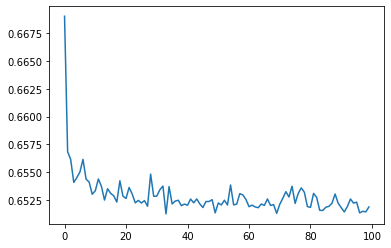

dim number 17
(1, 5000, 2)
(100,)


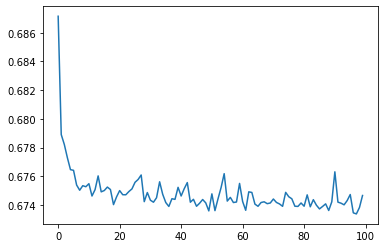

dim number 18
(1, 5000, 2)
(100,)


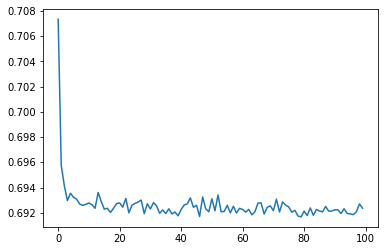

dim number 19
(1, 5000, 2)
(100,)


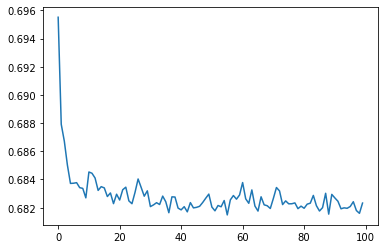

[8.367976455023664, 8.323180875637906, 8.266730673178811, 8.219979619022984]
7.967998491428407


C:\Users\shale\Anaconda3\envs\tf_1_15\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  import sys


dim number 0
dim number 1
(1, 5000, 2)
(100,)


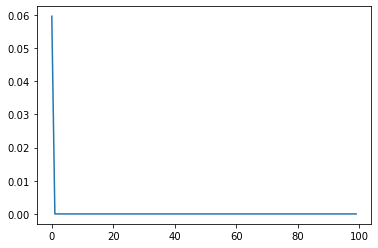

dim number 2
(1, 5000, 2)
(100,)


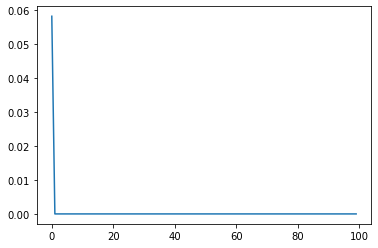

dim number 3
(1, 5000, 2)
(100,)


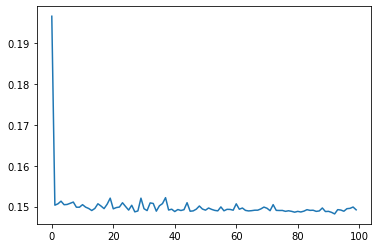

dim number 4
(1, 5000, 2)
(100,)


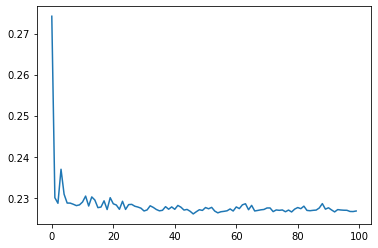

dim number 5
(1, 5000, 2)
(100,)


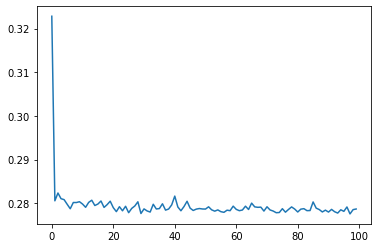

dim number 6
(1, 5000, 2)
(100,)


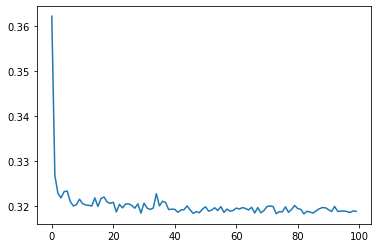

dim number 7
(1, 5000, 2)
(100,)


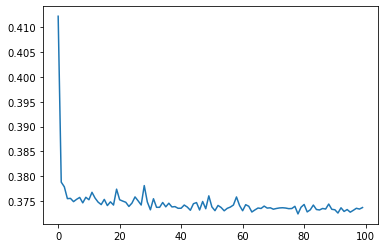

dim number 8
(1, 5000, 2)
(100,)


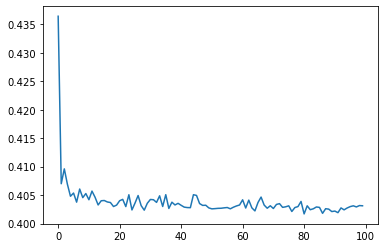

dim number 9
(1, 5000, 2)
(100,)


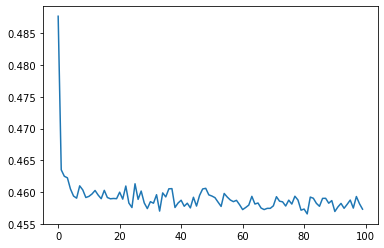

dim number 10
(1, 5000, 2)
(100,)


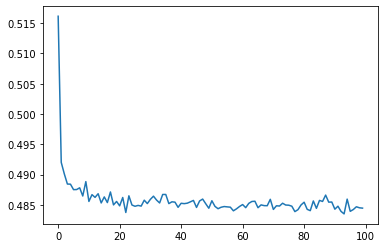

dim number 11
(1, 5000, 2)
(100,)


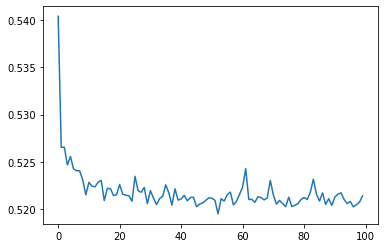

dim number 12
(1, 5000, 2)


In [ ]:
# run 2000 epochs for every rho/MI value ###poisson###m
epochs = 100
batch_size = 64
bins = 2
length = 5000
dims = 20
sub_loss_lst = []
H_y_lst = [ [] for _ in range(dims)]
H_y_total = []
results = []
H_mle = []
H_mm = []
H_sota = []
alphabet = 10**5
n = np.repeat(length, 10)
alpha = 1



H_true = zipf_entropy(alpha=alpha, alphabet=int(alphabet))



path = 'C:/Users/shale/Dropbox/PHD/repos/neute/second_version/results/data_zipf_alpha_1_5000samples_alphabet_10_5'

my_callbacks = [keras.callbacks.EarlyStopping(patience=5, verbose=0)]
for k, size in enumerate(n):    
    
    H_y_lst = [ [] for _ in range(dims)]
    data = pd.read_csv(os.path.join(path, 'data_zipf_alpha_1_5000samples_alphabet_10_5_({}).csv'.format(k)))
    data = np.array(data)

    entropy = Entropy(k=int(alphabet))
    fins = sample_to_fin(np.reshape(data, [-1]).tolist())
    H_sota.append(entropy.estimate(fins)*np.log(2))
    H_mm.append(entropy.estimate_Miller_Madow(fins)*np.log(2))
    H_mle.append(entropy.estimate_plug(fins)*np.log(2))
    
    vf = np.vectorize(np.binary_repr)
    data = vf(data, width=dims)
    lst = []
    for i in data:
        lst.append([int(j) for j in i[0]])

    data = np.array(lst)
    model_lst = []
    opt_lst = []
    for m in range(0, dims):
        if m == 0:
            model_lst.append(None)
        else:
            model_lst.append(model_basic_classification([m], bins))

    for m in range(0, dims):
        if m == 0:
            opt_lst.append(None)
        else:
            opt_lst.append(optimizers.Adam())

    for m in range (1, dims):
        model_lst[m].compile(loss='categorical_crossentropy', optimizer=opt_lst[m], metrics=['accuracy'])
    
    for j in range(0, dims):
        print('dim number', j)
        if j != 0:
            x = data[:, range(j)]
            y = data[:, j]
            y = np.reshape(y, [-1, 1])
            y_hot = make_one_hot(y, 1, bins)
            print(np.array(y_hot).shape)
            hist = model_lst[j].fit(x, y_hot, epochs=epochs, batch_size=batch_size, validation_split=0, verbose=0, shuffle=True
                                   )#, callbacks=my_callbacks)
            H_y_lst[j].append(hist.history['loss'])
            print(np.shape(hist.history['loss']))
            plt.plot(hist.history['loss'])
            plt.show()
        else:
            y = data[:, j]
            p_1 = (np.sum(y)+10**-5)/float(size)
        
            H_y_lst[j].append([np.sum(np.array([p_1, 1-p_1] )*np.log([p_1, 1-p_1]))]*epochs)
    H_y_total.append(np.reshape(np.sum(H_y_lst, axis=0), [-1]))
    results.append(np.reshape(H_y_total, [-1])[-1])
    print(results)
    print(H_true)
    


In [29]:
total_results = pd.DataFrame([results, H_mm, H_mle, H_sota,np.repeat(H_true, len(n))]).transpose()
total_results.columns = ['CE', 'MM', 'Plug', 'polynomial', 'True']

In [30]:
total_results

,CE,MM,Plug,polynomial,True
0,8.140501,5.639415,5.310415,12.177792,7.967998
1,8.246486,5.772260,5.423260,12.356397,7.967998
2,8.005025,5.702144,5.369144,12.176490,7.967998
3,8.368037,5.737612,5.393612,12.327927,7.967998
4,7.963573,5.683017,5.349017,12.179326,7.967998
5,8.059171,5.658926,5.329926,12.097417,7.967998
6,8.213040,5.754062,5.413062,12.217268,7.967998
7,8.090545,5.622948,5.289948,12.120974,7.967998
8,7.959488,5.576392,5.252392,12.137366,7.967998
9,8.186272,5.709799,5.368799,12.267461,7.967998


total_results.to_pickle('results/H_zipf_alpha_05_1000samples_n_10_alphabet_10_5.pkl')

In [31]:
rmse_results = total_results.apply(lambda x: rmse(x, total_results.iloc[0, -1]), axis=0)


In [32]:
rmse_results

CE            0.199956
MM            2.283096
Plug          2.618558
polynomial    4.238639
True          0.000000
dtype: float64

In [33]:
total_results.to_pickle('results/R_results/data_zipf_alpha_05_500samples_alphabet_10_5.pkl')